In [ ]:
!pip install eralchemy


In [ ]:
import eralchemy
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lennykiruthu/linkedin-jobs-sqlite --unzip -p ./data

Dataset URL: https://www.kaggle.com/datasets/lennykiruthu/linkedin-jobs-sqlite
License(s): CC-BY-SA-4.0
  0% 0.00/67.3M [00:00<?, ?B/s]
100% 67.3M/67.3M [00:00<00:00, 938MB/s]


The following table are in our database: [('companies',), ('skills',), ('industries',), ('positions',), ('company_industries',), ('company_specialities',), ('employee_count',), ('job_skills',), ('job_industries',)]


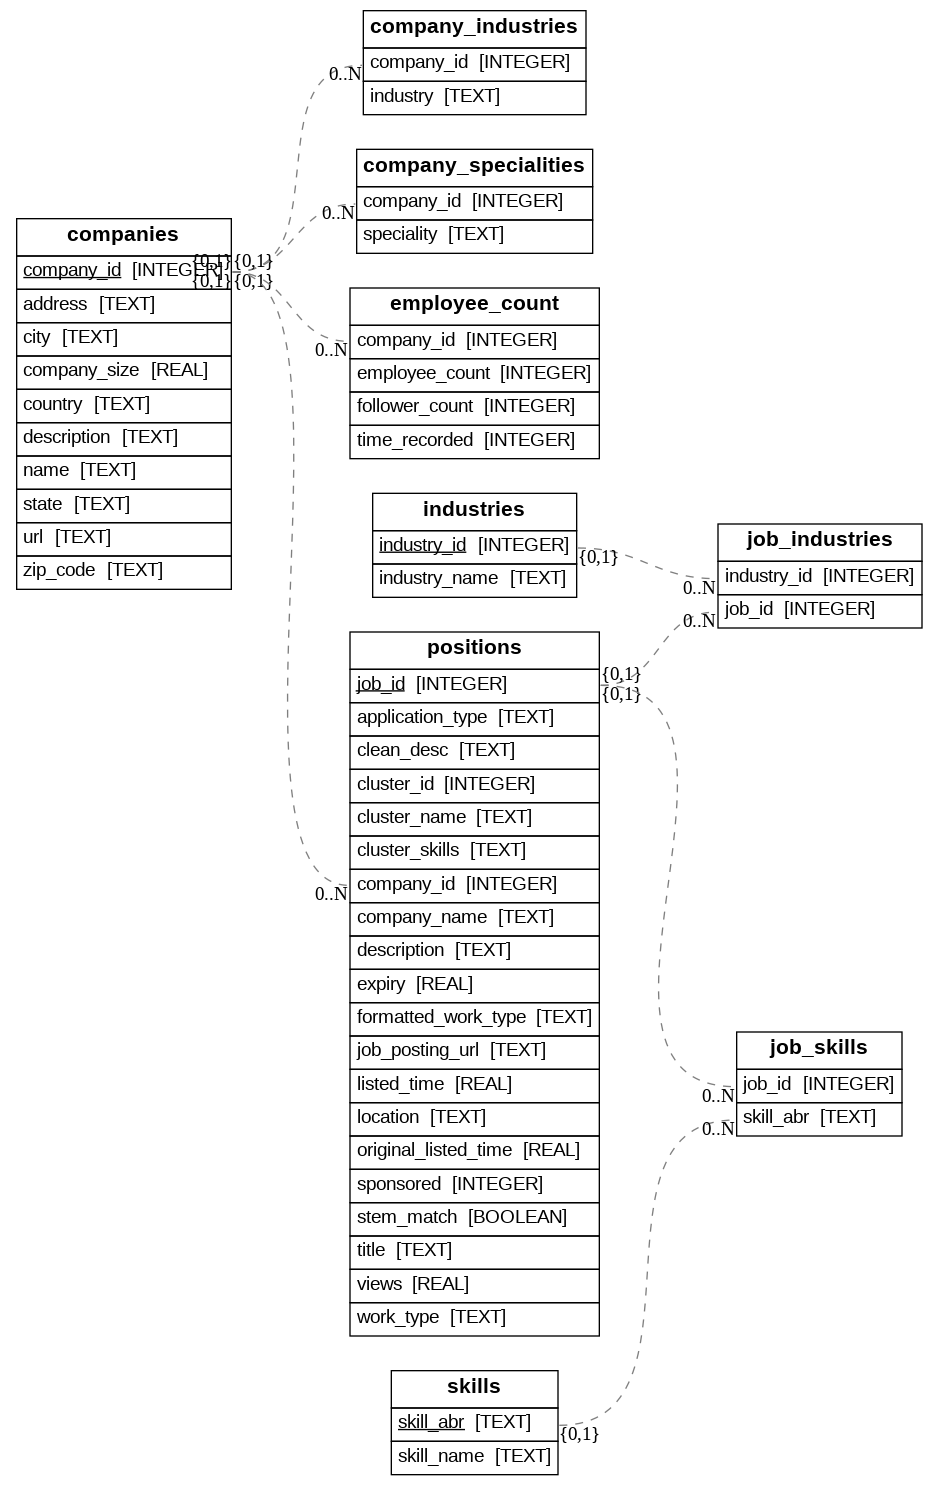

In [ ]:
import sqlite3
from IPython.display import Image

conn = sqlite3.connect('./data/linkedin_jobs.db')
cur  = conn.cursor()

cur.execute("SELECT name FROM  sqlite_master WHERE type='table'")
print(f"The following table are in our database: {cur.fetchall()}")

!cp /content/data/linkedin_jobs.db /content/data/tmp_linkedin_jobs.db
!eralchemy -i sqlite:////content/data/tmp_linkedin_jobs.db -o /content/data/linkedin_jobs_erd.dot
!dot -Tpng /content/data/linkedin_jobs_erd.dot -o /content/data/linkedin_jobs_erd.png
Image(filename='/content/data/linkedin_jobs_erd.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

positions_df            = pd.read_sql("SELECT * FROM positions", conn)
companies_df            = pd.read_sql("SELECT * FROM companies", conn)
company_industries_df   = pd.read_sql("SELECT * FROM company_industries", conn)
company_specialities_df = pd.read_sql("SELECT * FROM company_specialities", conn)
employee_count_df       = pd.read_sql("SELECT * FROM employee_count", conn)
skills_df               = pd.read_sql("SELECT * FROM skills", conn)
job_industries_df       = pd.read_sql("SELECT * FROM job_industries", conn)
job_skills_df           = pd.read_sql("SELECT * FROM job_skills", conn)
industries_df           = pd.read_sql("SELECT * FROM industries", conn)


def Explore(title, df):
  display(Markdown(title))
  display(df.head(10))
  display(Markdown('### Descriptive Statistics'))
  display(df.describe())
  display(Markdown('### Missing Values'))
  display(df.isnull().sum().sort_values(ascending=False))
  display(Markdown('### Data Types'))
  display(df.dtypes)
  display(Markdown('### Shape'))
  display(df.shape)

Explore('# Companies', company_specialities_df)

# Companies

,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage
5,20300,Private Banking
6,20300,Trust Services
7,20300,Insurance
8,20300,Wealth Management
9,3570660,Advertising


### Descriptive Statistics

,company_id
count,1.693870e+05
mean,1.258875e+07
std,2.451128e+07
min,1.009000e+03
25%,1.103290e+05
50%,1.346497e+06
75%,1.067675e+07
max,1.034588e+08


### Missing Values

,0
company_id,0
speciality,0


### Data Types

,0
company_id,int64
speciality,object


### Shape

(169387, 2)

- Companies data can be used to show the top 3 companies that hire the most in each type of cluster. All names are present except 1.
- Company industries data can be used to show what top 3 companies industries in each type of cluster. This is relative to the company and not to the job. All data is present.
- Company specialities data can be used to show what top 3 companies specialities in each type of cluster. This is relative to the company and not to the job. All data is present.
- Employee count data can be used to show employee data over time.
- I won't be using skills and job_skills since I extracted skills in the feature engineering notebook.
- Industries and Job_industries data can be used to show the frequency of each industry in each cluster

In [ ]:
merged_industries_df = pd.merge(job_industries_df, industries_df, on='industry_id', how='left')
merged_industries_df = pd.merge(positions_df, merged_industries_df, on='job_id', how='left')

Explore('# Merged Industries', merged_industries_df)

# Merged Industries

,job_id,company_name,title,description,location,company_id,views,formatted_work_type,original_listed_time,job_posting_url,...,listed_time,sponsored,work_type,stem_match,cluster_id,cluster_name,clean_desc,cluster_skills,industry_id,industry_name
0,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,"Denver, CO",76987056,273.0,Part-time,1.713281e+12,https://www.linkedin.com/jobs/view/175485704/?...,...,1.713281e+12,0,PART_TIME,1,14,Software Engineer,job description goyt is seeking a skilled and ...,"['code', 'html', 'javascript']",6.0,"Technology, Information and Internet"
1,266825034,Recruitment Design,Software Support Specialist,Are you driven by the thrill of solving proble...,"McLean, VA",99212509,NaN,Full-time,1.712860e+12,https://www.linkedin.com/jobs/view/266825034/?...,...,1.712860e+12,0,FULL_TIME,1,31,Staff Engineer (Software),are you driven by the thrill of solving proble...,"['designing', 'communication skills', 'javascr...",104.0,Staffing and Recruiting
2,1129235875,"TURNER HYDRAULICS, INC",Industrial Sales Representative,&nbsp;Job descriptionTurner Hydraulics Inc. is...,"Lancaster, PA",53824769,3.0,Full-time,1.713208e+12,https://www.linkedin.com/jobs/view/1129235875/...,...,1.713208e+12,0,FULL_TIME,1,35,"Sales Representative, Industrial",nbsp job descriptionturner hydraulics inc is...,['sales'],88.0,Individual and Family Services
3,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,...,1.712904e+12,0,FULL_TIME,1,59,Maintenance Mechanic,we re growing caffeinate your career at mzb ...,"['testing', 'excellent communication']",104.0,Staffing and Recruiting
4,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",United States,69611476,21.0,Full-time,1.713493e+12,https://www.linkedin.com/jobs/view/2234533717/...,...,1.713493e+12,0,FULL_TIME,1,62,Full Stack Engineer,location remote\ncompany overview skillfit a...,"['ai', 'code', 'database', 'code', 'software d...",11.0,Business Consulting and Services
5,2428973832,"Grow West MD, LLC",Staff Accountant,The ideal candidate will be responsible for ti...,"Cumberland, MD",59147406,2.0,Full-time,1.713530e+12,https://www.linkedin.com/jobs/view/2428973832/...,...,1.713530e+12,0,FULL_TIME,1,23,Staff Accountant,the ideal candidate will be responsible for ti...,['excel'],23.0,Food and Beverage Manufacturing
6,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...","Foster City, CA",2610793,NaN,Contract,1.713480e+12,https://www.linkedin.com/jobs/view/2558399667/...,...,1.713480e+12,0,CONTRACT,1,73,Validation Engineer,validation engineer labware limsfoster city ...,"['interpersonal skills', 'database']",15.0,Pharmaceutical Manufacturing
7,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...","Foster City, CA",2610793,NaN,Contract,1.713480e+12,https://www.linkedin.com/jobs/view/2558399667/...,...,1.713480e+12,0,CONTRACT,1,73,Validation Engineer,validation engineer labware limsfoster city ...,"['interpersonal skills', 'database']",12.0,Biotechnology Research
8,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...","Foster City, CA",2610793,NaN,Contract,1.713480e+12,https://www.linkedin.com/jobs/view/2558399667/...,...,1.713480e+12,0,CONTRACT,1,73,Validation Engineer,validation engineer labware limsfoster city ...,"['interpersonal skills', 'database']",17.0,Medical Equipment Manufacturing
9,2747409392,ViaBot,Robot Monitor & Maintenance Technician,Robot Monitor & Maintenance TechnicianAt ViaBo...,"Sunnyvale, CA",18344349,7.0,Full-time,1.712643e+12,https://www.linkedin.com/jobs/view/2747409392/...,...,1.712643e+12,0,FULL_TIME,1,15,Maintenance Technician,robot monitor maintenance te

### Descriptive Statistics

,job_id,company_id,views,original_listed_time,expiry,listed_time,sponsored,stem_match,cluster_id,industry_id
count,3.963700e+04,3.963700e+04,39128.000000,3.963700e+04,3.963700e+04,3.963700e+04,39637.0,39637.0,39637.000000,39625.000000
mean,3.898602e+09,1.135189e+07,17.657074,1.713165e+12,1.716111e+12,1.713225e+12,0.0,1.0,46.745692,234.310158
std,3.788775e+07,2.521033e+07,72.066314,4.950172e+08,1.965978e+09,3.861038e+08,0.0,0.0,30.349076,669.845813
min,1.754857e+08,1.009000e+03,1.000000,1.704737e+12,1.713265e+12,1.712346e+12,0.0,1.0,0.000000,1.000000
25%,3.895214e+09,8.221000e+03,3.000000,1.712866e+12,1.715485e+12,1.712892e+12,0.0,1.0,19.000000,25.000000
50%,3.902328e+09,1.648600e+05,5.000000,1.713398e+12,1.716044e+12,1.713451e+12,0.0,1.0,46.000000,48.000000
75%,3.904577e+09,4.872007e+06,11.000000,1.713478e+12,1.716086e+12,1.713483e+12,0.0,1.0,75.000000,96.000000
max,3.906267e+09,1.034730e+08,5132.000000,1.713573e+12,1.729125e+12,1.713573e+12,0.0,1.0,99.000000,3253.000000


### Missing Values

,0
views,509
industry_name,29
industry_id,12
title,0
job_id,0
company_name,0
company_id,0
location,0
description,0
formatted_work_type,0


### Data Types

,0
job_id,int64
company_name,object
title,object
description,object
location,object
company_id,int64
views,float64
formatted_work_type,object
original_listed_time,float64
job_posting_url,object


### Shape

(39637, 22)

In [ ]:
positions_df['cluster_name'].unique().tolist()

['Software Engineer',
 'Staff Engineer (Software)',
 'Sales Representative, Industrial',
 'Maintenance Mechanic',
 'Full Stack Engineer',
 'Staff Accountant  ',
 'Validation Engineer',
 'Maintenance Technician',
 'Marketing Campaign Specialist',
 'Project Engineer',
 'Data Engineer',
 'Account Manager',
 'Account Executive',
 'Accounting Manager',
 'Nursing Assistant - Hamilton - 4 Main Med Surg Ortho - FT/Nights',
 'Retail Sales Associate',
 'Data Specialist',
 'Engineering Technician',
 'Engineering Manager',
 'Account Specialist',
 'Sales Engineer',
 'Senior Software Engineer',
 'Fleet Engineering Specialist',
 'Maintenance Manager',
 'Senior Engineer',
 'Embedded Engineer',
 'Mechanical Engineer',
 'Quality Engineer',
 'Industrial Painter',
 'Finance Manager',
 'Engineer',
 'Accounts Payable Specialist',
 'Vice President Finance',
 'Data Engineer - Remote',
 'Staff Engineer - Mechanical Component',
 'Sr Software Engineer',
 'Finance Intern',
 'Regulatory Affairs Specialist',
 'Acco

In [ ]:
data_analyst_df = positions_df[['cluster_id', 'cluster_name', 'title', 'cluster_skills']].query("cluster_name == 'Accountant'")
data_analyst_df.head(10)

,cluster_id,cluster_name,title,cluster_skills
50,87,Accountant,Accountant,"['bi', 'microsoft excel', 'interpersonal skills']"
142,87,Accountant,Accountant,['erp']
153,87,Accountant,Construction Accountant,[]
246,87,Accountant,Accountant I Corporate Reporting,"['excel', 'oracle', 'oracle', 'coding', 'codin..."
250,87,Accountant,Corporate Accountant,[]
342,87,Accountant,Financial Accountant,"['coding', 'sap', 'excel', 'excellent communic..."
401,87,Accountant,Office Accountant/Manager,[]
443,87,Accountant,Certified Public Accountant,[]
555,87,Accountant,Accountant,"['erp', 'interpersonal skills']"
574,87,Accountant,Property Accountant,"['excel', 'teamwork']"


In [ ]:
from collections import Counter
import ast

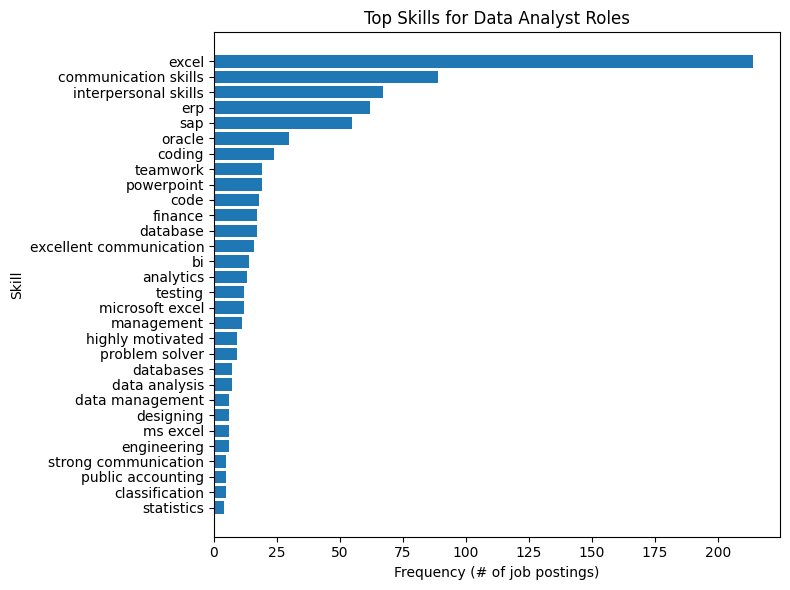

In [ ]:
# Convert strings to actual Python lists
data_analyst_df["cluster_skills"] = data_analyst_df["cluster_skills"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# ✅ Count unique skills per row
skill_counts = Counter()

for skills in data_analyst_df["cluster_skills"]:
    unique_skills = set(skills)  # remove duplicates in the same row
    skill_counts.update(unique_skills)

# ✅ Convert to DataFrame for easy plotting
skills_df = pd.DataFrame(skill_counts.items(), columns=["skill", "count"]).sort_values(by="count", ascending=False)

# ✅ Plot bar chart
plt.figure(figsize=(8, 6))
plt.barh(skills_df["skill"], skills_df["count"])
plt.xlabel("Frequency (# of job postings)")
plt.ylabel("Skill")
plt.title(f"Top Skills for Data Analyst Roles")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

In [ ]:
data_analyst_merged_industries_df = merged_industries_df[['cluster_id', 'cluster_name', 'title', 'cluster_skills', 'industry_name']].query("cluster_name == 'Accountant'")
data_analyst_merged_industries_df.head(10)

,cluster_id,cluster_name,title,cluster_skills,industry_name
54,87,Accountant,Accountant,"['bi', 'microsoft excel', 'interpersonal skills']",Hospitals and Health Care
150,87,Accountant,Accountant,['erp'],Construction
161,87,Accountant,Construction Accountant,[],Construction
276,87,Accountant,Accountant I Corporate Reporting,"['excel', 'oracle', 'oracle', 'coding', 'codin...",Oil and Gas
281,87,Accountant,Corporate Accountant,[],Investment Management
394,87,Accountant,Financial Accountant,"['coding', 'sap', 'excel', 'excellent communic...",Industrial Machinery Manufacturing
473,87,Accountant,Office Accountant/Manager,[],Banking
533,87,Accountant,Certified Public Accountant,[],Accounting
534,87,Accountant,Certified Public Accountant,[],Financial Services
535,87,Accountant,Certified Public Accountant,[],Investment Management


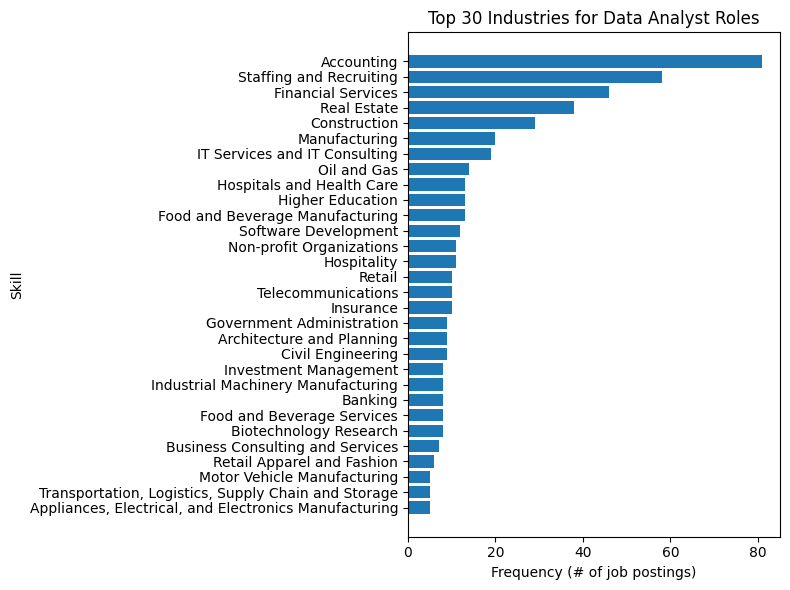

In [ ]:
industry_counts = Counter(data_analyst_merged_industries_df['industry_name'].tolist())

top_30 = industry_counts.most_common(30)

industries, counts = zip(*top_30)

# ✅ Plot bar chart
plt.figure(figsize=(8, 6))
plt.barh(industries, counts)
plt.xlabel("Frequency (# of job postings)")
plt.ylabel("Skill")
plt.title(f"Top 30 Industries for Data Analyst Roles")
plt.gca().invert_yaxis()  # highest at top

plt.tight_layout()
plt.show()

In [ ]:
merged_companies_df = pd.merge(positions_df, companies_df, on='company_id', how='left')

# Explore('# Merged companies dataframe', merged_companies_df)

In [ ]:
data_analyst_merged_companies_df = merged_companies_df[['cluster_id', 'cluster_name', 'title', 'cluster_skills', 'company_name']].query("cluster_name == 'Data Analyst'")
data_analyst_merged_companies_df.head(10)

,cluster_id,cluster_name,title,cluster_skills,company_name,name
68,7,Data Analyst,Data Analyst,"['statistics', 'visualization', 'communication...",Tenazx Inc,Tenazx Inc
129,7,Data Analyst,eCommerce Data Analyst,"['data analysis', 'data analysis']",Radiant Systems Inc,Radiant Systems Inc
189,7,Data Analyst,Data Management Analyst,"['data management', 'data management', 'data m...",EPITEC,EPITEC
201,7,Data Analyst,"Senior Analyst, Data & Analytics","['analytics', 'analytics', 'sql', 'database', ...",Quigley-Simpson,Quigley-Simpson
457,7,Data Analyst,Sr. Procurement Data Analyst,"['data analysis', 'database', 'data analysis',...",Republic Services,Republic Services
511,7,Data Analyst,Design Data Analyst,"['data analytics', 'analytics']",A.G. KUNZ LLC,A.G. KUNZ LLC
531,7,Data Analyst,Data Analyst - Expert with Excel,"['excel', 'data analytics', 'excel', 'dashboar...",OpTech,OpTech
605,7,Data Analyst,Legal Data Analyst (Dallas/Chicago),[],CBRE,CBRE
681,7,Data Analyst,Crash Data Analyst,"['databases', 'database']",Maricopa County,Maricopa County
738,7,Data Analyst,Data Analyst,"['visualization', 'data modeling', 'data gover...",Acro Service Corp,Acro Service Corp


In [ ]:
!pip install squarify

In [ ]:
import squarify

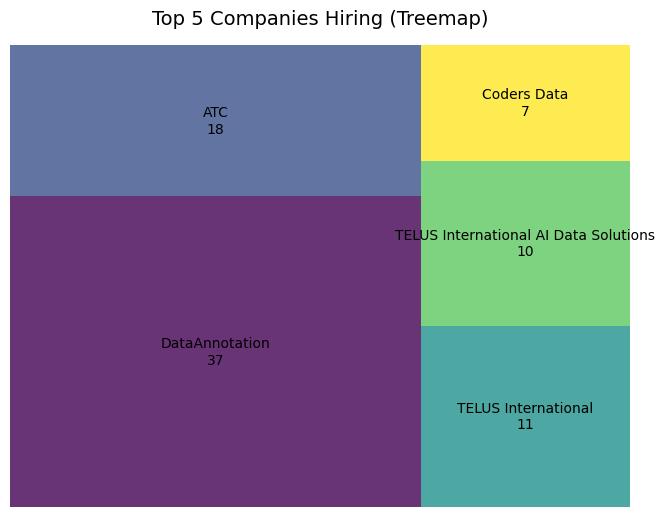

In [ ]:
companies_counts = Counter(data_analyst_merged_companies_df['company_name'].tolist())

top_5 = companies_counts.most_common(5)

companies, counts = zip(*top_5)

# Values & labels
sizes = counts
labels = [f"{c}\n{n}" for c, n in zip(companies, counts)]

# Plot
# Normalize colors between 0 and 1 to ensure they are properly utilized.
colors = [plt.cm.viridis(i / (len(sizes)-1)) for i in range(len(sizes))]
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)

plt.title("Top 5 Companies Hiring (Treemap)", fontsize=14, pad=15)
plt.axis("off")
plt.show()

In [ ]:
merged_companies_specialities_df = pd.merge(positions_df, company_specialities_df, on='company_id', how='left')

# Explore("# Merged Company Specialities", merged_companies_specialities_df)

# Merged Company Specialities

,job_id,company_name,title,description,location,company_id,views,formatted_work_type,original_listed_time,job_posting_url,...,expiry,listed_time,sponsored,work_type,stem_match,cluster_id,cluster_name,clean_desc,cluster_skills,speciality
0,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,"Denver, CO",76987056,273.0,Part-time,1.713281e+12,https://www.linkedin.com/jobs/view/175485704/?...,...,1.715873e+12,1.713281e+12,0,PART_TIME,1,14,Software Engineer,job description goyt is seeking a skilled and ...,"['code', 'html', 'javascript']",Ecommerce
1,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,"Denver, CO",76987056,273.0,Part-time,1.713281e+12,https://www.linkedin.com/jobs/view/175485704/?...,...,1.715873e+12,1.713281e+12,0,PART_TIME,1,14,Software Engineer,job description goyt is seeking a skilled and ...,"['code', 'html', 'javascript']",Big data
2,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,"Denver, CO",76987056,273.0,Part-time,1.713281e+12,https://www.linkedin.com/jobs/view/175485704/?...,...,1.715873e+12,1.713281e+12,0,PART_TIME,1,14,Software Engineer,job description goyt is seeking a skilled and ...,"['code', 'html', 'javascript']",Deep web
3,266825034,Recruitment Design,Software Support Specialist,Are you driven by the thrill of solving proble...,"McLean, VA",99212509,NaN,Full-time,1.712860e+12,https://www.linkedin.com/jobs/view/266825034/?...,...,1.728412e+12,1.712860e+12,0,FULL_TIME,1,31,Staff Engineer (Software),are you driven by the thrill of solving proble...,"['designing', 'communication skills', 'javascr...",Recruitment
4,1129235875,"TURNER HYDRAULICS, INC",Industrial Sales Representative,&nbsp;Job descriptionTurner Hydraulics Inc. is...,"Lancaster, PA",53824769,3.0,Full-time,1.713208e+12,https://www.linkedin.com/jobs/view/1129235875/...,...,1.715800e+12,1.713208e+12,0,FULL_TIME,1,35,"Sales Representative, Industrial",nbsp job descriptionturner hydraulics inc is...,['sales'],NaN
5,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,...,1.715496e+12,1.712904e+12,0,FULL_TIME,1,59,Maintenance Mechanic,we re growing caffeinate your career at mzb ...,"['testing', 'excellent communication']",recruiting
6,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,...,1.715496e+12,1.712904e+12,0,FULL_TIME,1,59,Maintenance Mechanic,we re growing caffeinate your career at mzb ...,"['testing', 'excellent communication']",job search
7,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,...,1.715496e+12,1.712904e+12,0,FULL_TIME,1,59,Maintenance Mechanic,we re growing caffeinate your career at mzb ...,"['testing', 'excellent communication']",talent acquisition
8,2147609816,The Job Network,Maintenance Mechanic,We're growing! Caffeinate Your Career™ at MZB!...,"Suffolk, VA",167757,2.0,Full-time,1.712904e+12,https://www.linkedin.com/jobs/view/2147609816/...,...,1.715496e+12,1.712904e+12,0,FULL_TIME,1,59,Maintenance Mechanic,we re growing caffeinate your career at mzb ...,"['testing', 'excellent communication']",job matching
9,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",United States,69611476,21.0,Full-time,1.713493e+12,https://www.linkedin.com/jobs/view/2234533717/...,...,1.716085e+12,1.713493e+12,0,FULL_TIME,1,62,Full Stack Engineer,location remote\ncompany overview skillfit a...,"['ai', 'code', 'database', 'code', 'software d...",NaN


### Descriptive Statistics

,job_id,company_id,views,original_listed_time,expiry,listed_time,sponsored,stem_match,cluster_id
count,2.501050e+05,2.501050e+05,247004.000000,2.501050e+05,2.501050e+05,2.501050e+05,250105.0,250105.0,250105.000000
mean,3.898902e+09,7.050066e+06,17.677859,1.713163e+12,1.716084e+12,1.713224e+12,0.0,1.0,45.673169
std,2.308358e+07,1.861725e+07,63.595967,5.028381e+08,1.884369e+09,3.861739e+08,0.0,0.0,29.774716
min,1.754857e+08,1.009000e+03,1.000000,1.704737e+12,1.713265e+12,1.712346e+12,0.0,1.0,0.000000
25%,3.894938e+09,1.105600e+04,3.000000,1.712865e+12,1.715484e+12,1.712892e+12,0.0,1.0,19.000000
50%,3.902301e+09,1.640060e+05,5.000000,1.713398e+12,1.716044e+12,1.713450e+12,0.0,1.0,45.000000
75%,3.904506e+09,2.632918e+06,11.000000,1.713479e+12,1.716087e+12,1.713484e+12,0.0,1.0,72.000000
max,3.906267e+09,1.034730e+08,5132.000000,1.713573e+12,1.729125e+12,1.713573e+12,0.0,1.0,99.000000


### Missing Values

,0
speciality,5529
views,3101
title,0
company_name,0
job_id,0
location,0
description,0
formatted_work_type,0
company_id,0
job_posting_url,0


### Data Types

,0
job_id,int64
company_name,object
title,object
description,object
location,object
company_id,int64
views,float64
formatted_work_type,object
original_listed_time,float64
job_posting_url,object


### Shape

(250105, 21)

In [ ]:
data_analyst_merged_companies_specialities_df = merged_companies_specialities_df[['cluster_id', 'cluster_name', 'title', 'cluster_skills', 'company_name', 'speciality']].query("cluster_name == 'Data Engineer'")
data_analyst_merged_companies_specialities_df.head(10)

,cluster_id,cluster_name,title,cluster_skills,company_name,speciality
25,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Microsoft Power Platform
26,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Data Architecture
27,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Data Engineering
28,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Data Analytics
29,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Digital Transformation
30,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Low Code Development
31,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Machine Learning
32,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Artificial Intelligence
33,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Master Data Management
34,63,Data Engineer,Data Architect,"['aws', 'data warehousing', 'sql', 'redshift',...",Saxon AI,Data Migration


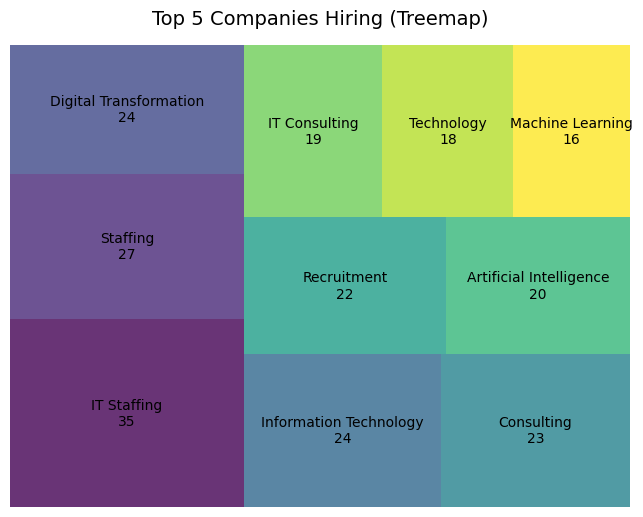

In [ ]:
data_analyst_merged_companies_specialities_clean_df = data_analyst_merged_companies_specialities_df.dropna(subset=['speciality'])

companies_counts = Counter(data_analyst_merged_companies_specialities_clean_df['speciality'].tolist())

top_10 = companies_counts.most_common(10)

companies, counts = zip(*top_10)

# Values & labels
sizes = counts
labels = [f"{c}\n{n}" for c, n in zip(companies, counts)]

# Plot
# Normalize colors between 0 and 1 to ensure they are properly utilized.
colors = [plt.cm.viridis(i / (len(sizes)-1)) for i in range(len(sizes))]
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)

plt.title("Top 5 Companies Hiring (Treemap)", fontsize=14, pad=15)
plt.axis("off")
plt.show()